In [38]:
import matplotlib.pyplot as plt
import numpy as np
import gzip
import timeit

In [39]:
# acessando arquivo que contem o rotulo das imagens
arq_rotulos_treino = gzip.open(r'C:\Users\João V. Hidalgo\Documents\Jupyter\MNIST\train-labels-idx1-ubyte.gz', 'r')
arq_rotulos_treino.read(8)

# transformando os rotulos em dados
buf_rotulos_treino = arq_rotulos_treino.read(12000)
data_rotulos_treino = np.frombuffer(buf_rotulos_treino, dtype=np.uint8).astype(np.int32)
rotulos_treino = data_rotulos_treino

print(rotulos_treino[:5])

[5 0 4 1 9]


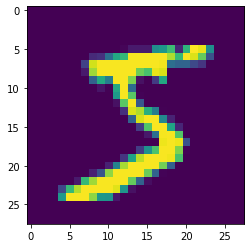

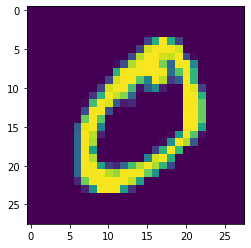

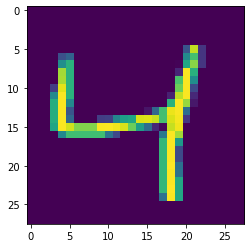

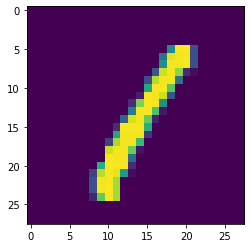

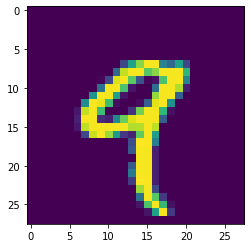

In [40]:
# acessando arquivo que contem as imagens de treino
arq_imagens_treino = gzip.open(r'C:\Users\João V. Hidalgo\Documents\Jupyter\MNIST\train-images-idx3-ubyte.gz', 'r')
arq_imagens_treino.read(16)
num_imagens_treino = 12000

# transformando as imagens em dados
buf_imagens_treino = arq_imagens_treino.read(28 * 28 * num_imagens_treino)
data_imagens_treino = np.frombuffer(buf_imagens_treino, dtype=np.uint8).astype(np.float32)
imagens_treino = data_imagens_treino.reshape(num_imagens_treino, 28, 28, 1)

# printando as imagens para ver se correspondem aos rotulos 
for i in range(0, 5):
    plt.imshow(np.asarray(imagens_treino[i]).squeeze())
    plt.show()

In [41]:
# Acessando o arquivo com os rotulos de teste 
arq_rolutos_test = gzip.open(r'C:\Users\João V. Hidalgo\Documents\Jupyter\MNIST\t10k-labels-idx1-ubyte.gz', 'r')
arq_rolutos_test.read(8)
num_rotulos_test = 2000

# transformando os arquivos em dados
buf_arq_rotulos_test = arq_rolutos_test.read(num_rotulos_test)
rotulos_teste = np.frombuffer(buf_arq_rotulos_test, dtype=np.uint8).astype(np.int32)
print(rotulos_teste[:5])

[7 2 1 0 4]


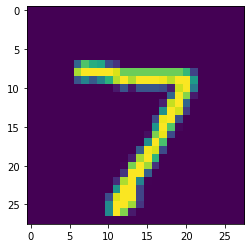

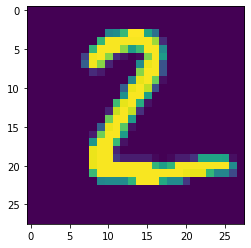

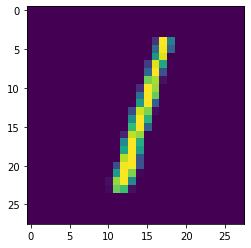

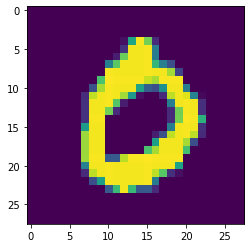

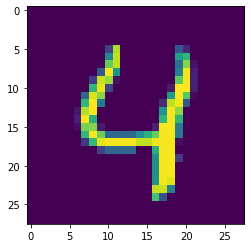

In [42]:
# acessando o arquivo com as imagens de teste
arq_imagens_test = gzip.open(r'C:\Users\João V. Hidalgo\Documents\Jupyter\MNIST\t10k-images-idx3-ubyte.gz', 'r')
arq_imagens_test.read(16)
num_imagens_test = 2000

# transformando em dados 
buf_imagens_test = arq_imagens_test.read(28 * 28 * num_imagens_test)
data_imagens_test = np.frombuffer(buf_imagens_test, dtype=np.uint8).astype(np.float32)
imagens_test = data_imagens_test.reshape(num_imagens_test, 28, 28, 1)
for i in range(0, 5):
    plt.imshow(np.asarray(imagens_test[i]).squeeze())
    plt.show()


In [43]:
# transformando as imagens de treino em uma unica matriz 12000 x 784 onda cada linha corresponde a uma imagem
X_treino = np.asarray(imagens_treino).squeeze().reshape(12000, 784)
print(X_treino.shape)

(12000, 784)


In [44]:
# tirando a media
mean_treino = np.mean(X_treino)

X_treino = X_treino - np.mean(X_treino)
print(X_treino.shape)

(12000, 784)


In [45]:
starttime = timeit.default_timer()

# calculando as matrizes SVD
U_treino, S_treino, Vt_treino = np.linalg.svd(X_treino, full_matrices=False)

# calculando o tempo de processamento
tempo = timeit.default_timer() - starttime
print(f'''Dimensao das Matrizes: 
U = {U_treino.shape}
S = {S_treino.shape}
Vt = {Vt_treino.shape}''')
print(f'\nTempo de processamento foi de: {tempo:.2f} segundos')

Dimensao das Matrizes: 
U = (12000, 784)
S = (784,)
Vt = (784, 784)

Tempo de processamento foi de: 1.05 segundos


In [46]:
num_autovalor = 50
Y_treino = np.dot(U_treino[:,:num_autovalor], np.diag(S_treino[:num_autovalor]))
X_treino = np.dot(Y_treino, Vt_treino[:num_autovalor, :])
print(X_treino.shape)

(12000, 784)


In [47]:
# retomando a media
X_treino = X_treino + mean_treino

# tranformando o vetor de ordem 784 devolta em imagem 28 x 28
plot_treino = X_treino[0]
print(plot_treino.shape)
plot_treino = plot_treino.reshape(28, 28)
print(plot_treino.shape)

(784,)
(28, 28)


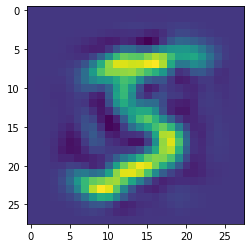

In [48]:
plot_treino = np.asarray(plot_treino)
plt.imshow(plot_treino)
plt.show()

In [49]:
X_test = np.asarray(imagens_test).squeeze().reshape(num_imagens_test, 784)
print(X_test.shape)

(2000, 784)


In [52]:
starttime = timeit.default_timer()
acertos = 0

for i in range(0, num_imagens_test):
    img_test = X_test[i].reshape((784, 1))
    img_treino = X_treino[0].reshape((784, 1))
    
    img_result = img_test - img_treino
    distancia_min = np.linalg.norm(img_result)
    
    for j in range(0, num_imagens_treino):
        img_treino = X_treino[j].reshape((784, 1))
        img_result = img_test - img_treino
        distancia = np.linalg.norm(img_result)
        
        if distancia < distancia_min:
            distancia_min = distancia
            index = j
            
    if rotulos_teste[i] == rotulos_treino[index]:
        acertos += 1
        
    distancia_min = 0
    
acuracia = (acertos/num_imagens_test) * 100       
print(f'Acuracia: {acuracia} Numero de acertos: {acertos} Numero de autovalores: {num_autovalor} ')
    

Acuracia: 94.25 Numero de acertos: 1885 Numero de autovalores: 50 
